In [1]:
#WORKING
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from numpy import asarray as ar,exp
import seaborn as sns
import pandas as pd
import spectral
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import concurrent.futures
import multiprocessing as mp
from lib_hyperspec import *

In [2]:
#IMAGE PLOTTING
filename = 'jan24sam3'
path_to_file = f'/home/royabhinav/Desktop/CTIS/Data/data_jan24'
img_path  = f'{path_to_file}/{filename}.tif'

# Open the file
with rasterio.open(img_path) as src:
    # Read the .tif image file as a 2D array
    image = src.read()

df = pd.read_csv("/home/royabhinav/Desktop/CTIS/calibrations.csv")

print(image.shape)

#plot_img(image)

/home/royabhinav/.local/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(3, 2592, 4608)


418.4102071336292 863.2444184420634


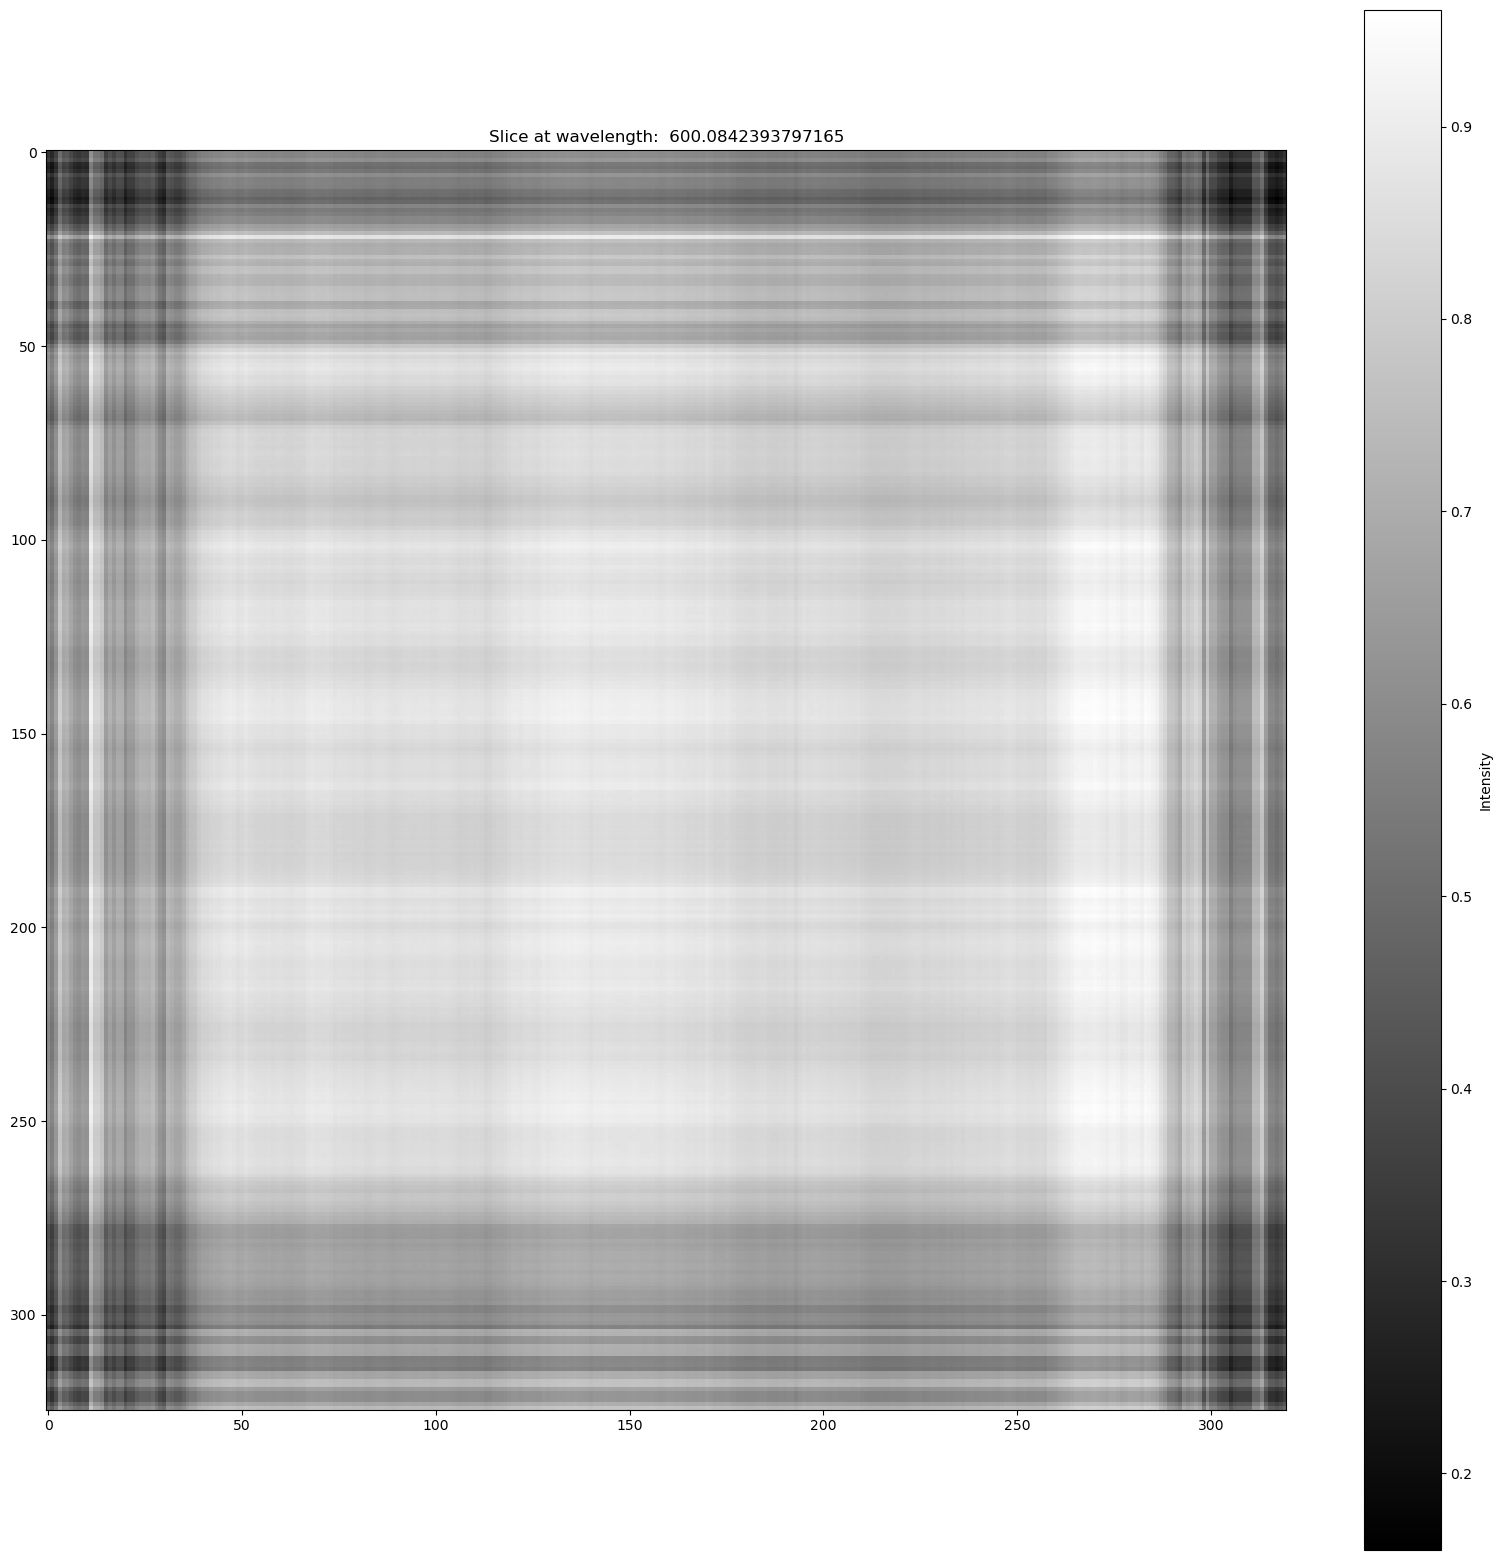

(325, 320, 1000)


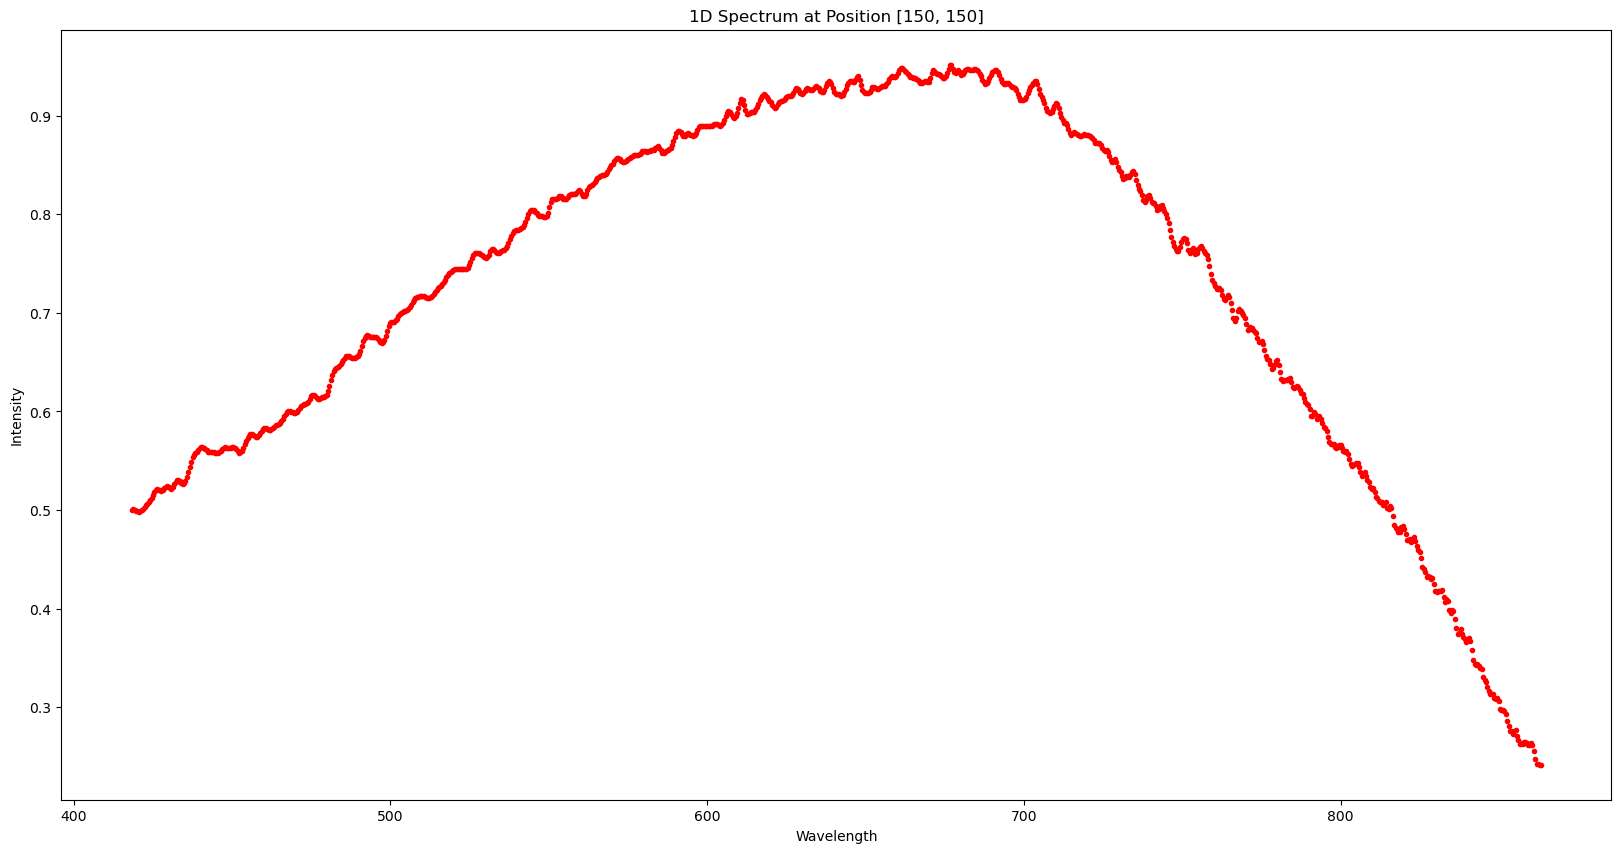

In [5]:
cube = np.load(f'/home/royabhinav/Desktop/CTIS/Output_Apr19/BASALT5/BASALT5_cube.npy')
new_wavelengths = np.load(f'/home/royabhinav/Desktop/CTIS/Output_Apr19/BASALT5/BASALT5_wavelengths.npy')
print(min(new_wavelengths), max(new_wavelengths))
# Select a specific wavelength to visualize
wavelength = 600
slice_2d = cube[:, :, np.argmin(np.abs(new_wavelengths - wavelength))]

# Visualize the 2D slice
plt.figure(figsize=(20, 20))
plt.imshow(slice_2d, cmap='gray')
plt.colorbar(label='Intensity')
plt.title(f'Slice at wavelength:  {new_wavelengths[np.argmin(np.abs(new_wavelengths - wavelength))]}')
plt.show()

print(cube.shape)

pos = [150, 150]

spec_1d = cube[pos[0], pos[1], :]

plt.figure(figsize=(20, 10))
# Plot the 1D spectrum
plt.plot(new_wavelengths, spec_1d,'r.')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('1D Spectrum at Position {}'.format(pos))
plt.show()
